(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

# Bias and Varience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# the physical law says: S = 1/2 * F / M * t*2
# S: displacement, M: mass, F: force
# Let's say we know nothing about physics
# Given this data measure points: 
# (t, S) for N points, we want to predict for (t_new) what is S_new

In [2]:
ground_truth_coef = 1./2 * 10 / 2
t = np.random.random(10) * 3
ground_truth_result = ground_truth_coef * t**2

# measure error
measure_result = ground_truth_result + np.random.randn(10)*2

t_new = np.random.random(5) * 3
# s_new

In [3]:
from sklearn import linear_model, metrics
lm_lr = linear_model.LinearRegression()

In [4]:
# Under fitting, what is the error? (using 1 order)
# we need to run it over multple times to see the difference
N = 10000
error = []
error_train = []
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5) * 3).reshape(-1, 1)
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t, measure_result))

error = np.array(error)
#error_train = np.array(error_train)

In [5]:
#print error_train.mean(), error_train.std()
print (error.mean(), error.std())

4.963407317985014 5.310396860682272


In [6]:
# Over fitting, what is the error? (using 3 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2, t**3])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2, t_new**3])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t[:,0], measure_result))

    
error = np.array(error)
#error_train = np.array(error_train)

In [7]:
print (error.mean(), error.std())

43.85931219921983 2110.085267591082


In [8]:
# Over fitting, what is the error? (using 2 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    
error = np.array(error)

In [9]:
print (error.mean(), error.std())

3.4726209720613923 20.034732682166634


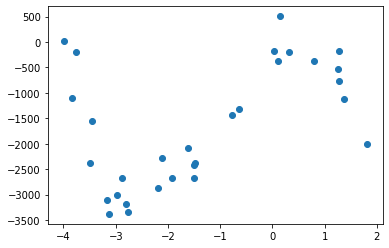

In [10]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

In [ ]:
# Q1. Under ALL circumstances, is it that the more complicated a model is, the lower training error? (Y/N)
# Q2. Under ALL circumstances, is it that the more complicated a model is, the lower testing error? (Y/N)
# Q3. How does standard deviation looks like for both training & testing errors (uncertain, high, LOW)
Y, N, high, high

## Bias & varience: model complexity

In [ ]:
# single variable linear model (low varience)

# nearest-neighbour model (high varience) 

In [ ]:
# Q. is single variable linear regression model high bias, low varience? 

In [ ]:
# Data set 1. 
N = 300
np.random.seed(1)
x = (np.random.random([N, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

In [ ]:
# Data set 2. 
N = 5000
r = np.random.rand(N)
theta = np.random.rand(N) * 1.0 * np.pi
y = np.sin(theta) * r
plt.scatter(r, theta, c=y)

## Bias & varience: data size

In [11]:
from sklearn import datasets, model_selection # change this to cross_validation if use different version of sklearn
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100, noise=100)
X = data[0]
Y = data[1]
print (X.shape, Y.shape)

(1000, 100) (1000,)


In [12]:
ts_range = np.arange(0.05, 1, 0.05)
N_run = 50
t_score = []
v_score = []
for train_s in ts_range:
    t_score.append([])
    v_score.append([])
    for iseed in range(N_run):
        X1, X2, Y1, Y2 = model_selection.train_test_split(X, Y, train_size=train_s, random_state=iseed)
        rlm = linear_model.LinearRegression()
        rlm.fit(X1, Y1)
        t_score[-1].append(metrics.r2_score(Y1, rlm.predict(X1)))
        v_score[-1].append(metrics.r2_score(Y2, rlm.predict(X2)))
    # print train_s

In [13]:
t_score = np.array(t_score)
v_score = np.array(v_score)

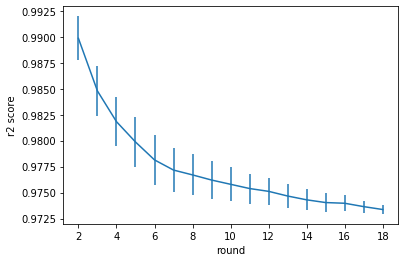

In [14]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
plt.xlabel("round")
plt.ylabel("r2 score")
fig.show()

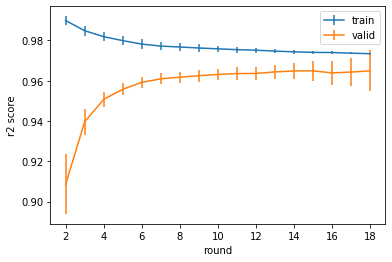

In [15]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s, label='train')
x = range(v_score.shape[0])[2:]
y = v_score.mean(axis=1)[2:]
s = v_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s, label='valid')
plt.xlabel("round")
plt.ylabel("r2 score")
plt.legend()
fig.show()

# Regression in-depth

In [ ]:
# Regular linear regression

# Lasso

# Ridge

# Elastic-net

## Regularization

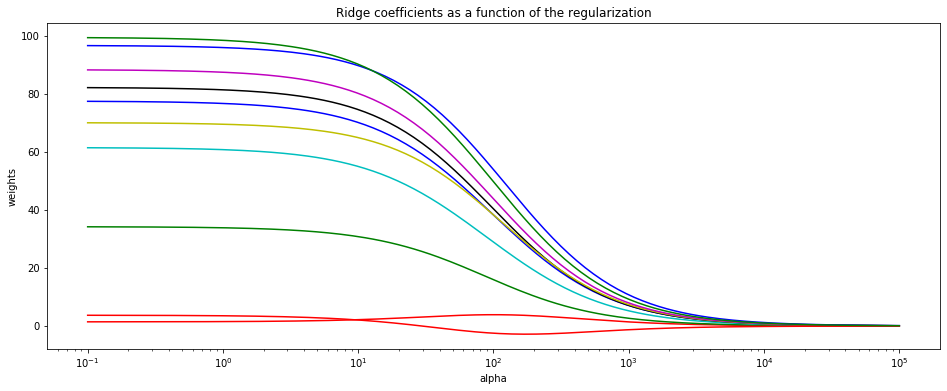

In [16]:
from sklearn import datasets
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
data = datasets.make_regression(n_samples=100, n_features=10, n_informative=10, random_state=0)

X = data[0]
y = data[1]

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize=[16, 6])

ax = plt.gca()
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.set_prop_cycle(color=['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

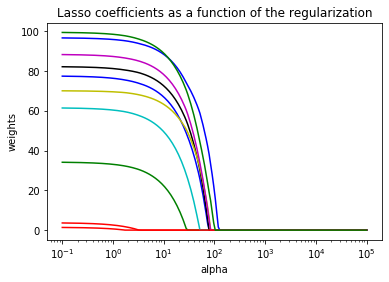

In [17]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Lasso()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.set_prop_cycle(color=['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

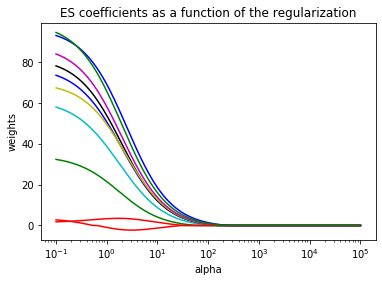

In [18]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.ElasticNet(l1_ratio=0.5)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax.set_prop_cycle(color=['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ES coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_friedman1(random_state=0)
X = data[0]
y = data[1]

## Stochastic gradient descent (SGD)

In [ ]:
# http://vis.supstat.com/2013/03/gradient-descent-algorithm-with-r/
# 

In [19]:
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100)
X = data[0]
y = data[1]

In [20]:
# compare efficiency and accuracy for SGD and tradition LR

In [21]:
%%time
lrg1 = linear_model.LinearRegression()
lrg1.fit(X, y)

CPU times: user 24 ms, sys: 6.14 ms, total: 30.2 ms
Wall time: 9.46 ms


In [22]:
%%time
lrg2 = linear_model.SGDRegressor()
lrg2.fit(X,y)

CPU times: user 8.84 ms, sys: 1.64 ms, total: 10.5 ms
Wall time: 8.33 ms


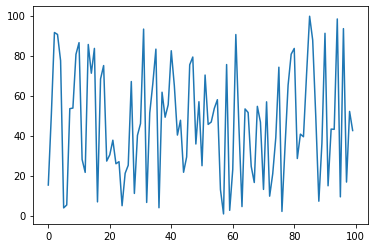

In [23]:
%matplotlib inline
plt.plot(lrg1.coef_)

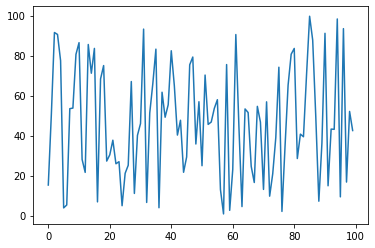

In [24]:
plt.plot(lrg2.coef_)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  3.,  2.,  1.,  3.,  5.,  6., 23., 30., 13.,  6.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.41926683e-03, -3.37885756e-03, -3.33844828e-03, -3.29803900e-03,
        -3.25762972e-03, -3.21722044e-03, -3.17681116e-03, -3.13640188e-03,
        -3.09599261e-03, -3.05558333e-03, -3.01517405e-03, -2.97476477e-03,
        -2.93435549e-03, -2.89394621e-03, -2.85353693e-03, -2.81312766e-03,
        -2.77271838e-03, -2.73230910e-03, -2.69189982e-03, -2.65149054e-03,
        -2.61108126e-03, -2.57067198e-03, -2.53026271e

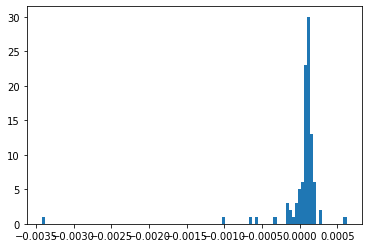

In [25]:
a = (lrg1.coef_ - lrg2.coef_) / lrg1.coef_

plt.hist(a[(a>-10) & (a<10)], bins=100)

## Preprocessing

In [26]:
from sklearn import datasets, preprocessing

In [27]:
X, Y = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2)

In [28]:
X1 = X
X2 = X.copy()
X2[:,1] *= 1000

In [29]:
from sklearn import linear_model

In [30]:
m1 = linear_model.LinearRegression()
m1.fit(X1, Y)

m2 = linear_model.LinearRegression()
m2.fit(X2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
m1.coef_

array([68.92190279, 80.70879951])

In [32]:
m2.coef_

array([68.92190279,  0.0807088 ])

In [33]:
m1 = linear_model.SGDRegressor()
m1.fit(X1, Y)

m2 = linear_model.SGDRegressor()
m2.fit(X2, Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
m1.coef_, m1.intercept_

(array([68.91438328, 80.7007846 ]), array([0.00044736]))

In [35]:
from sklearn import metrics

In [36]:
metrics.mean_squared_error(m1.predict(X1), Y)

0.00011791167320115106

In [37]:
m2.coef_, m2.intercept_

(array([-1.57573039e+08,  8.34254342e+11]), array([-5.60061914e+10]))

In [38]:
metrics.mean_squared_error(m2.predict(X2), Y)

7.125208826969245e+29

## Robustness regression

In [39]:
# Why robustness is needed?

x = np.random.random(100) * 10 
y = 2.0 * x + 30 + 2.0 * np.random.rand(len(x))

xn = np.random.random(10) * 3
yn = 6.0 * xn + 4 + 2.0 * np.random.rand(len(xn))

xnew = np.concatenate([x,xn])
ynew = np.concatenate([y,yn])

xnew = xnew.reshape([-1,1])

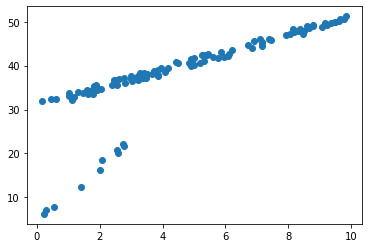

In [40]:
plt.scatter(xnew, ynew)

In [41]:
lm_lr = linear_model.LinearRegression()

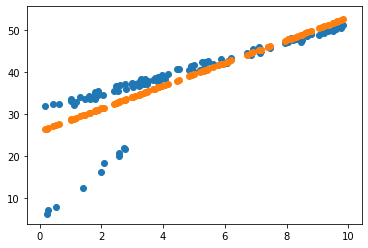

In [42]:
lm_lr.fit(xnew, ynew)
y_pred = lm_lr.predict(xnew)
plt.scatter(xnew, ynew)
plt.scatter(xnew, y_pred)

In [43]:
# linear_model.RANSACRegressor?
lm_lr = linear_model.RANSACRegressor()

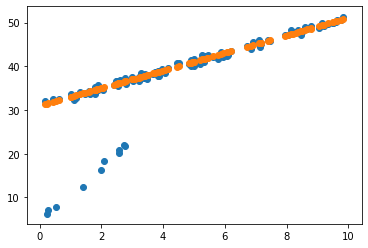

In [44]:
lm_lr.fit(xnew, ynew)
y_pred = lm_lr.predict(xnew)
plt.scatter(xnew, ynew)
plt.scatter(xnew, y_pred)

In [ ]:
# RANSAC
# https://upload.wikimedia.org/wikipedia/commons/c/c0/RANSAC_LINIE_Animiert.gif